# Support Vector Machine (SVM)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Arshad/DataMining/diabetes.csv')
columns = dataset.columns
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Exploratory Data Analysis

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

You can compare each column with the other by changing feature1 and feateure2 variables!

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


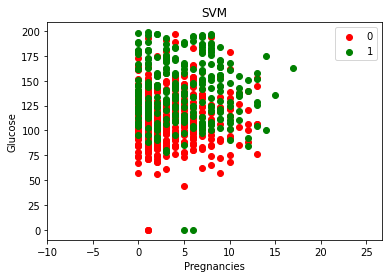

In [ ]:
from matplotlib.colors import ListedColormap
feature1 = 0
feature2 = 1
X1, X2 = np.meshgrid(np.arange(start = X[:, feature1].min() - 10, stop = X[:, feature1].max() + 10, step = 0.25),
                     np.arange(start = X[:, feature2].min() - 10, stop = X[:, feature2].max() + 10, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(X_set).reshape(X1.shape)),
            #  alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM')
plt.xlabel(columns[feature1])
plt.ylabel(columns[feature2])
plt.legend()
plt.show()

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[  9.     89.     62.    ...  22.5     0.142  33.   ]
 [  1.    118.     58.    ...  33.3     0.261  23.   ]
 [  0.     91.     80.    ...  32.4     0.601  27.   ]
 ...
 [  4.     94.     65.    ...  24.7     0.148  21.   ]
 [ 11.     85.     74.    ...  30.1     0.3    35.   ]
 [  5.    136.     82.    ...   0.      0.64   69.   ]]


In [ ]:
print(y_train)

[0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0
 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 1 0 

In [ ]:
print(X_test)

[[  1.    199.     76.    ...  42.9     1.394  22.   ]
 [  2.    107.     74.    ...  33.6     0.404  23.   ]
 [  4.     76.     62.    ...  34.      0.391  25.   ]
 ...
 [  1.    109.     60.    ...  25.4     0.947  21.   ]
 [  3.    128.     78.    ...  21.1     0.268  55.   ]
 [  5.     88.     78.    ...  27.6     0.258  37.   ]]


In [ ]:
print(y_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 1.50755225 -1.01521454 -0.40451932 ... -1.22070104 -0.98325882
  -0.04863985]
 [-0.82986389 -0.09964691 -0.61509602 ...  0.13719053 -0.62493647
  -0.88246592]
 [-1.12204091 -0.95207195  0.54307587 ...  0.0240329   0.39884168
  -0.5489355 ]
 ...
 [ 0.04666716 -0.85735805 -0.24658679 ... -0.9440935  -0.96519215
  -1.04923114]
 [ 2.09190629 -1.14149973  0.2272108  ... -0.26514771 -0.5075031
   0.11812536]
 [ 0.33884418  0.46863645  0.64836422 ... -4.04964181  0.51627505
   2.953134  ]]


In [ ]:
print(X_test)

[[-0.82986389  2.4576282   0.33249916 ...  1.34420526  2.78665365
  -0.96584853]
 [-0.53768687 -0.44693118  0.2272108  ...  0.17490974 -0.19434743
  -0.88246592]
 [ 0.04666716 -1.42564141 -0.40451932 ...  0.22520202 -0.23349189
  -0.71570071]
 ...
 [-0.82986389 -0.38378859 -0.50980767 ... -0.85608201  1.4406865
  -1.04923114]
 [-0.24550986  0.21606607  0.43778751 ... -1.39672402 -0.60385869
   1.7857775 ]
 [ 0.33884418 -1.04678584  0.43778751 ... -0.57947447 -0.63396981
   0.28489057]]


## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting a new result

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[117  13]
 [ 25  37]]


0.8020833333333334

## Visualising the Training set results

## Let's Try The RBF Kernel!

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## predictiong the Train set results

In [ ]:
y_pred = classifier.predict(X_train)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_train),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm = confusion_matrix(y_train, y_pred)
print("the confusion matrix:")
print(cm)
print("the accuracy on test set: ", accuracy_score(y_train, y_pred))
print("precision, recall, f1score and support for train set are:(separated by classes) ", precision_recall_fscore_support(y_train, y_pred))

the confusion matrix:
[[342  28]
 [ 73 133]]
the accuracy on test set:  0.8246527777777778
precision, recall, f1score and support for train set are:(separated by classes)  (array([0.82409639, 0.82608696]), array([0.92432432, 0.64563107]), array([0.87133758, 0.72479564]), array([370, 206]))


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print("the confusion matrix:")
print(cm)
print("the accuracy on test set: ", accuracy_score(y_test, y_pred))
print("precision, recall, f1score and support for test set are:(separated by classes) ", precision_recall_fscore_support(y_test, y_pred))
print("roc auc score: ", roc_auc_score(y_test, y_pred))

the confusion matrix:
[[117  13]
 [ 30  32]]
the accuracy on test set:  0.7760416666666666
precision, recall, f1score and support for test set are:(separated by classes)  (array([0.79591837, 0.71111111]), array([0.9       , 0.51612903]), array([0.84476534, 0.59813084]), array([130,  62]))
roc auc score:  0.7080645161290322


## Draw ROC AUC curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


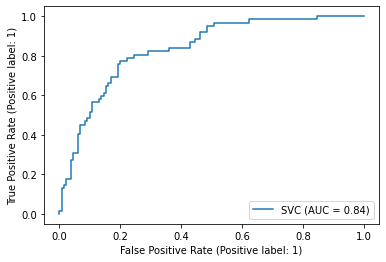

In [ ]:
plot_roc_curve(classifier, X_test, y_test) 
plt.show()

The C parameter determine the amount of cost for each false prediction. When this value is too high, the svm tries to predict every sample in the train set correctly. So it learns the noises in the dataset and can not generalize properly for unseen data. It is perfectly visible in its low accuracy for test data. On the other hand, When the regularization parameter C is too low, the cost of each misprediction won't force the model to learn as accurate as possible. So, it's accuracy will be too low on both train and test set.

## An example of underfitting which is a direct result of low misprediction cost:

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, C= 0.08)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print("the confusion matrix:")
print(cm)
print("the accuracy on test set: ", accuracy_score(y_train, y_pred))
print("precision, recall, f1score and support for train set are:(separated by classes) ", precision_recall_fscore_support(y_train, y_pred))
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("the confusion matrix:")
print(cm)
print("the accuracy on test set: ", accuracy_score(y_test, y_pred))
print("precision, recall, f1score and support for train set are:(separated by classes) ", precision_recall_fscore_support(y_test, y_pred))

the confusion matrix:
[[362   8]
 [147  59]]
the accuracy on test set:  0.7309027777777778
precision, recall, f1score and support for train set are:(separated by classes)  (array([0.71119843, 0.88059701]), array([0.97837838, 0.28640777]), array([0.82366325, 0.43223443]), array([370, 206]))
the confusion matrix:
[[124   6]
 [ 48  14]]
the accuracy on test set:  0.71875
precision, recall, f1score and support for train set are:(separated by classes)  (array([0.72093023, 0.7       ]), array([0.95384615, 0.22580645]), array([0.82119205, 0.34146341]), array([130,  62]))


As you can see the accuracy is approximatly the same for train and test set. But, both of them are low in comparison to the previous rbf model.

## An example of overfitting which is a direct result of high misprediction cost:

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, C= 100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print("the confusion matrix:")
print(cm)
print("the accuracy on test set: ", accuracy_score(y_train, y_pred))
print("precision, recall, f1score and support for train set are:(separated by classes) ", precision_recall_fscore_support(y_train, y_pred))
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("the confusion matrix:")
print(cm)
print("the accuracy on test set: ", accuracy_score(y_test, y_pred))
print("precision, recall, f1score and support for train set are:(separated by classes) ", precision_recall_fscore_support(y_test, y_pred))

the confusion matrix:
[[362   8]
 [ 17 189]]
the accuracy on test set:  0.9565972222222222
precision, recall, f1score and support for train set are:(separated by classes)  (array([0.95514512, 0.95939086]), array([0.97837838, 0.91747573]), array([0.96662216, 0.93796526]), array([370, 206]))
the confusion matrix:
[[107  23]
 [ 28  34]]
the accuracy on test set:  0.734375
precision, recall, f1score and support for train set are:(separated by classes)  (array([0.79259259, 0.59649123]), array([0.82307692, 0.5483871 ]), array([0.80754717, 0.57142857]), array([130,  62]))


As you can see, although the accuracy is 95 percent for train set, the model's accuracy on test set is not as high as train set.

## GridSearchCV

In [88]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.776 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.783 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.757 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.696 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.774 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.681 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.739 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.652 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.748 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [89]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


In [91]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

           0       0.83      0.91      0.86       130
           1       0.76      0.60      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.77       192
weighted avg       0.80      0.81      0.80       192

